In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

In [2]:
import math
import multiprocessing as mp
from matplotlib import pyplot as plt
import networkx as nx
from glob import glob
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'
plt.gray()

In [3]:
from epypes import pipeline
from epypes import compgraph

from rpa import cbcalib
from rpa.io import open_image

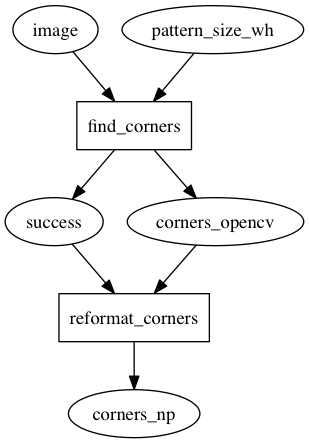

In [4]:
cg_corners = cbcalib.CGFindCorners()
nxpd.draw(cg_corners.to_networkx())

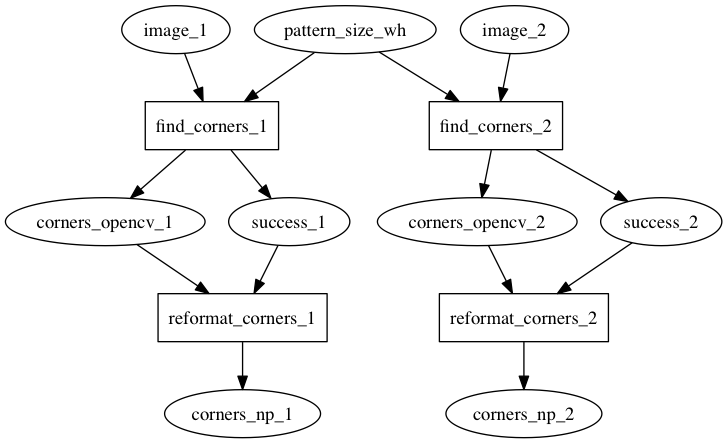

In [5]:
cg_corners_stereo = compgraph.graph_union_with_suffixing(
    cbcalib.CGFindCorners(), 
    cbcalib.CGFindCorners(),
    exclude=['pattern_size_wh']
)

nxpd.draw(cg_corners_stereo.to_networkx())

In [11]:
def dummy_save(im1, im2, corners1, corners2):
    pass
    
cg_corners_stereo_with_save = compgraph.add_new_vertices(
    cg_corners_stereo, 
    {'save': dummy_save}, 
    {'save': (('image_1', 'image_2', 'corners_np_1', 'corners_np_2'), None)}
)

In [6]:
im1 = open_image(opj(CODE_DIR, 'DATA/IMG/calib/opencv_left/left01.jpg'))
im2 = open_image(opj(CODE_DIR, 'DATA/IMG/calib/opencv_right/right01.jpg'))
psize = (9, 6)

In [12]:
runner = compgraph.CompGraphRunner(cg_corners_stereo_with_save, frozen_tokens={'pattern_size_wh': psize})

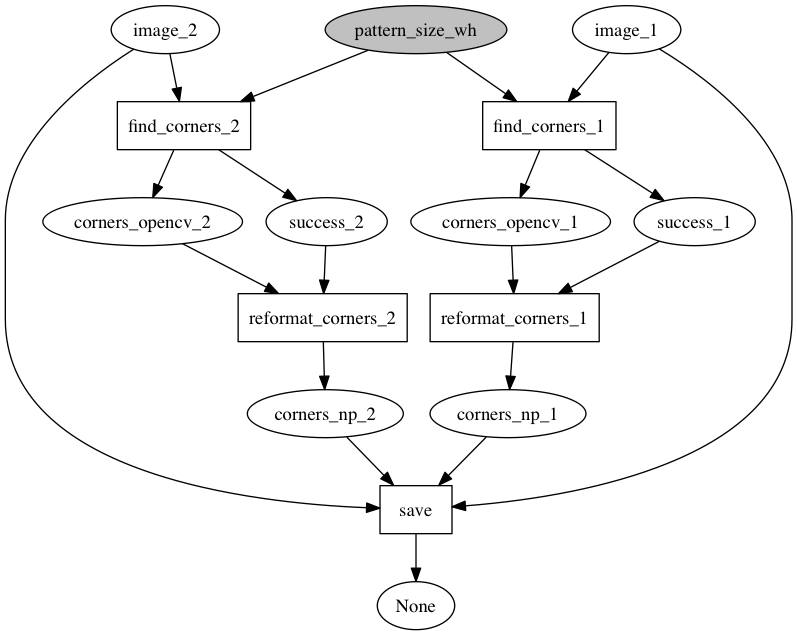

In [13]:
nxpd.draw(runner.token_manager.to_networkx())

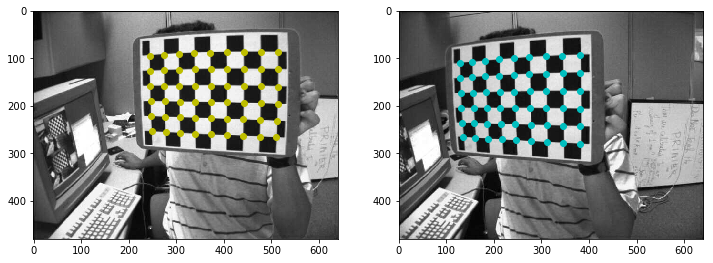

In [14]:
runner.run(image_1=im1, image_2=im2)
corners_1 = runner.token_value('corners_np_1')
corners_2 = runner.token_value('corners_np_2')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.plot(corners_1[:, 0], corners_1[:, 1], 'yo')

plt.subplot(1, 2, 2)
plt.imshow(im2)
plt.plot(corners_2[:, 0], corners_2[:, 1], 'co')